In [1]:
state = 'MT' 
year = 2020
objective_types = ['cut_edges', 'perimeter', 'inverse_Polsby_Popper', 'average_Polsby_Popper', 'bottleneck_Polsby_Popper']
starting_deviation = 0.01 

In [2]:
import sys, os
src_path = os.path.abspath(os.path.join('..', '..', 'src'))
sys.path.append(src_path)

In [3]:
filepath = '../../dat/' + str(year) + '/'
filename = state + '_county.json'
filename2 = state + '_county.shp'

In [4]:
from read import read_graph_from_json

G = read_graph_from_json(state, filepath + filename, year=year)
print(f"The state of {state} has {G._k} districts.")
G._ideal_population = sum(G.nodes[i]['TOTPOP'] for i in G.nodes) / G._k

The state of MT has 2 districts.


In [5]:
#import warm starts
sys.path.append(os.path.abspath('../heuristic'))
from MT_plans_2020 import plans
print(f"Loaded {len(plans)} plans from file.")
warm_starts = plans

Loaded 150 plans from file.


In [6]:
from epsilon_constraint import epsilon_constraint_method
from pareto import filter_and_sort_pareto
from metrics import scores

plans_dict = {}
for obj_type in objective_types:
    
    print(f"\n{'#' * 100}")
    print(f"Applying epsilon-constraint method for {state} with compactness objective {obj_type}")
    print(f"{'#' * 100}\n")
    
    plans_scores = [scores(G, plan, G._ideal_population, obj_type) for plan in warm_starts]
    _,_,nondominated_warm_starts_plans = filter_and_sort_pareto(plans=warm_starts, upper_bounds=plans_scores, obj_type=obj_type)
    print(f"Passing {len(nondominated_warm_starts_plans)} nondominated warm start plans")
    
    (new_plans, obj_bounds, deviations) = epsilon_constraint_method(
                G,                 
                obj_type,          
                contiguity ='lcut',                                             # {'lcut', 'scf', 'shir'} 
                cutoff=None,       
                verbose=True,
                warm_start_mode ='user',                                        # {'None', 'user', 'refinement'}
                warm_starts=nondominated_warm_starts_plans,                                         # if you have user define warm starts else it is None
                starting_deviation=starting_deviation, 
                time_limit=7200, 
                sizes=None,      
                max_B=True,                                                      # If symmetry_breaking is 'orbitope' or you have warm_start, max_B should be True   
                symmetry_breaking='orbitope',                                    # {None, 'orbitope', 'rsum'} 
                state=state,
                year=year
            )
    plans_dict[(state, obj_type)] = list(zip(new_plans, obj_bounds, deviations))
    warm_starts += new_plans


####################################################################################################
Applying epsilon-constraint method for MT with compactness objective cut_edges
####################################################################################################

Passing 8 nondominated warm start plans
Initially, L = 536692 and U = 547533 and k = 2.

****************************************
Trying deviation = 5421.125
****************************************
Using user-provided warm starts.
Selected warm_start = [[1, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 27, 30, 32, 33, 34, 36, 37, 38, 41, 42, 43, 44, 45, 46, 47, 48, 49, 51, 53, 55], [0, 2, 3, 4, 13, 23, 26, 28, 29, 31, 35, 39, 40, 50, 52, 54]]
Objective value: 10
Deviation: 2708.5

****************************************
Running labeling model!
****************************************
L = 536692 and U = 547533 and k = 2
Set parameter Username
Academic license - for non-commercial us

No feasible solution was found within the region: [0, 0.5]

####################################################################################################
Pareto Frontier for state MT,  objective cut_edges
####################################################################################################

Pareto front plans: [[[0, 1, 5, 6, 7, 10, 11, 12, 15, 16, 17, 19, 20, 21, 22, 24, 25, 27, 30, 32, 33, 34, 36, 37, 38, 41, 42, 43, 44, 45, 47, 48, 49, 51, 53, 54, 55], [2, 3, 4, 8, 9, 13, 14, 18, 23, 26, 28, 29, 31, 35, 39, 40, 46, 50, 52]], [[1, 5, 6, 7, 8, 9, 12, 14, 15, 16, 17, 18, 20, 21, 25, 27, 28, 29, 30, 31, 32, 33, 36, 37, 38, 39, 40, 41, 44, 45, 48, 49, 50, 52], [0, 2, 3, 4, 10, 11, 13, 19, 22, 23, 24, 26, 34, 35, 42, 43, 46, 47, 51, 53, 54, 55]], [[1, 5, 6, 7, 8, 9, 14, 15, 16, 17, 18, 20, 21, 25, 27, 28, 30, 31, 32, 33, 36, 37, 38, 39, 40, 41, 44, 45, 48, 49, 50, 52, 55], [0, 2, 3, 4, 10, 11, 12, 13, 19, 22, 23, 24, 26, 29, 34, 35, 42, 43, 46, 47, 51, 53, 54]], [[0, 

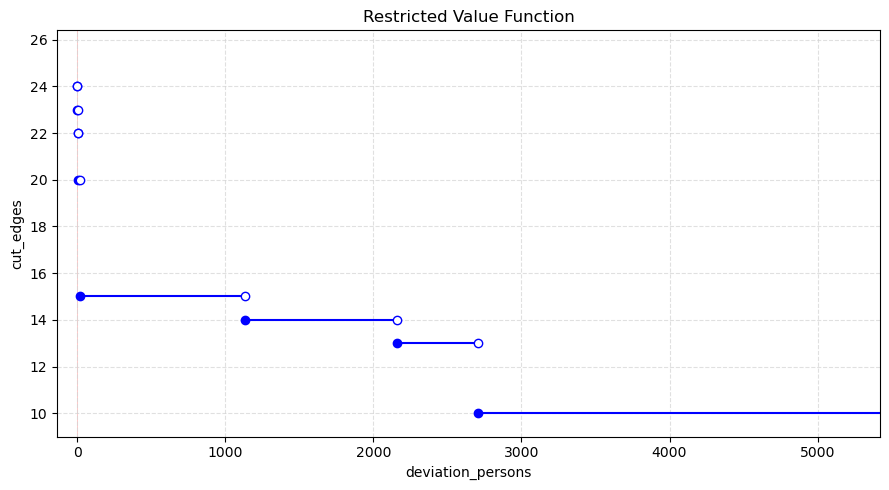

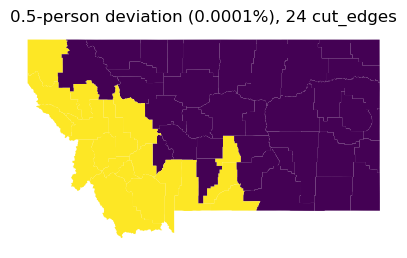

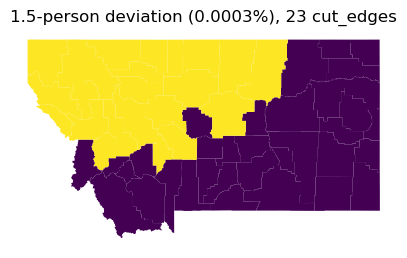

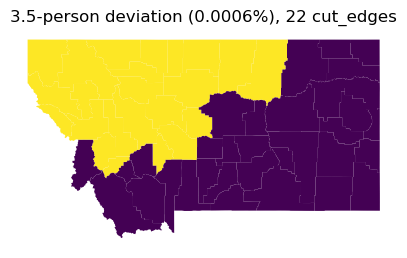

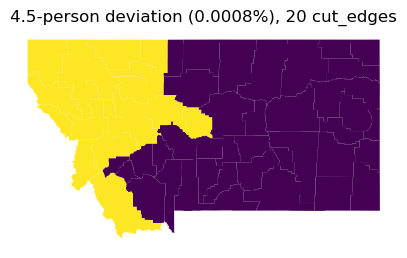

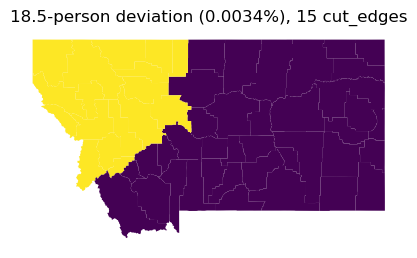

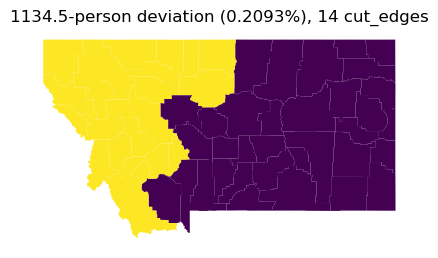

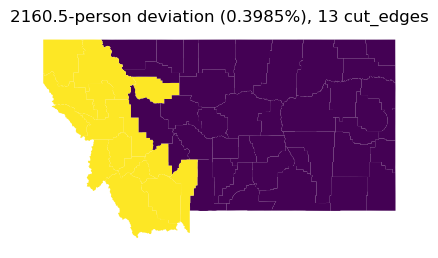

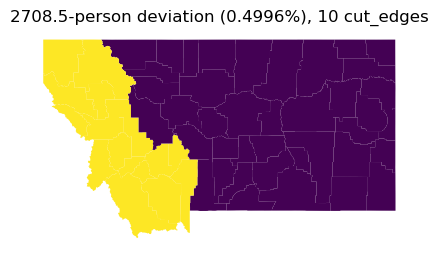

No feasible solution was found within the region: [0, 0.5]

####################################################################################################
Pareto Frontier for state MT,  objective perimeter
####################################################################################################

Pareto front plans: [[[0, 1, 5, 6, 7, 8, 9, 11, 12, 15, 16, 17, 20, 21, 24, 25, 27, 28, 29, 30, 32, 33, 34, 36, 37, 38, 41, 42, 43, 44, 46, 48, 49, 51, 52, 53, 55], [2, 3, 4, 10, 13, 14, 18, 19, 22, 23, 26, 31, 35, 39, 40, 45, 47, 50, 54]], [[1, 5, 6, 7, 8, 9, 12, 14, 15, 16, 17, 18, 20, 21, 25, 27, 28, 29, 30, 31, 32, 33, 36, 37, 38, 39, 40, 41, 44, 45, 48, 49, 50, 52], [0, 2, 3, 4, 10, 11, 13, 19, 22, 23, 24, 26, 34, 35, 42, 43, 46, 47, 51, 53, 54, 55]], [[1, 5, 6, 7, 8, 9, 14, 15, 16, 17, 18, 20, 21, 25, 27, 28, 30, 31, 32, 33, 36, 37, 38, 39, 40, 41, 44, 45, 48, 49, 50, 52, 55], [0, 2, 3, 4, 10, 11, 12, 13, 19, 22, 23, 24, 26, 29, 34, 35, 42, 43, 46, 47, 51, 53, 54]], [[0, 

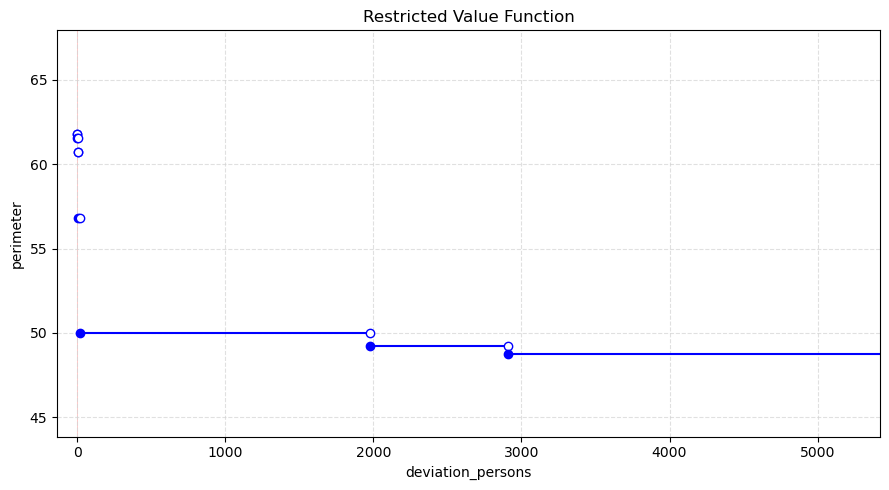

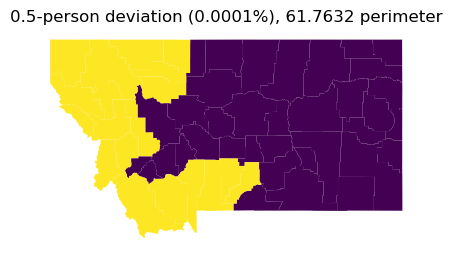

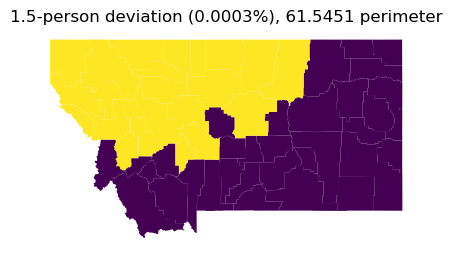

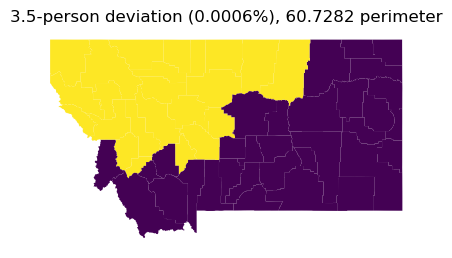

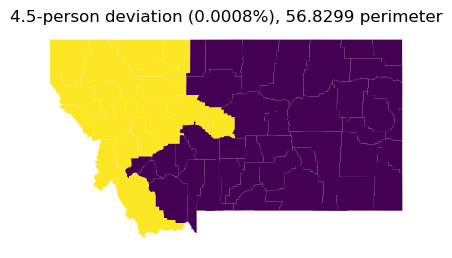

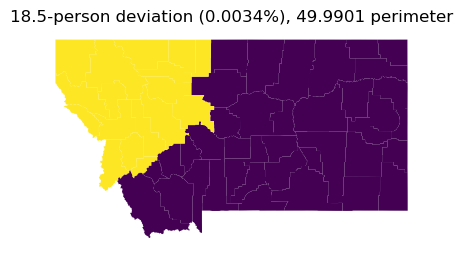

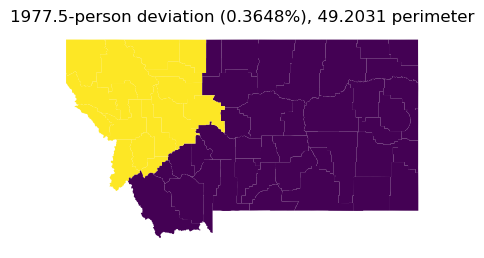

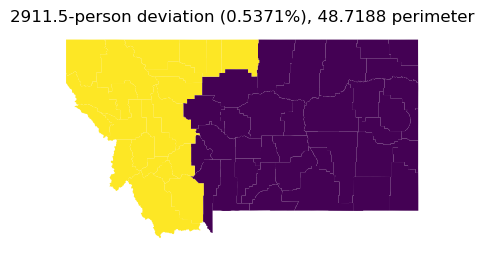

No feasible solution was found within the region: [0, 0.5]

####################################################################################################
Pareto Frontier for state MT,  objective inverse_Polsby_Popper
####################################################################################################

Pareto front plans: [[[0, 1, 5, 6, 7, 8, 9, 11, 12, 15, 16, 17, 20, 21, 24, 25, 27, 28, 29, 30, 32, 33, 34, 36, 37, 38, 41, 42, 43, 44, 46, 48, 49, 51, 52, 53, 55], [2, 3, 4, 10, 13, 14, 18, 19, 22, 23, 26, 31, 35, 39, 40, 45, 47, 50, 54]], [[1, 5, 6, 7, 8, 9, 12, 14, 15, 16, 17, 18, 20, 21, 25, 27, 28, 29, 30, 31, 32, 33, 36, 37, 38, 39, 40, 41, 44, 45, 48, 49, 50, 52], [0, 2, 3, 4, 10, 11, 13, 19, 22, 23, 24, 26, 34, 35, 42, 43, 46, 47, 51, 53, 54, 55]], [[1, 5, 6, 7, 8, 9, 14, 15, 16, 17, 18, 20, 21, 25, 27, 28, 30, 31, 32, 33, 36, 37, 38, 39, 40, 41, 44, 45, 48, 49, 50, 52, 55], [0, 2, 3, 4, 10, 11, 12, 13, 19, 22, 23, 24, 26, 29, 34, 35, 42, 43, 46, 47, 51, 53,

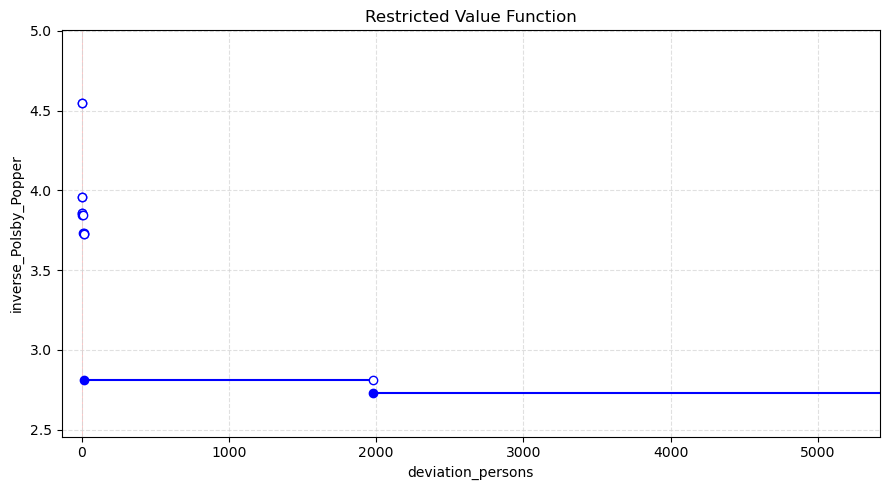

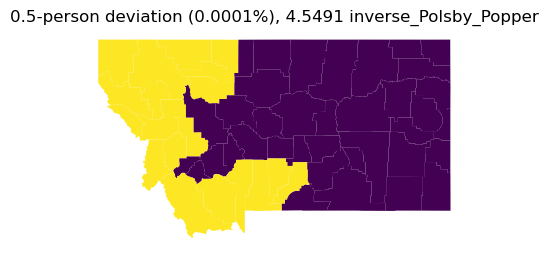

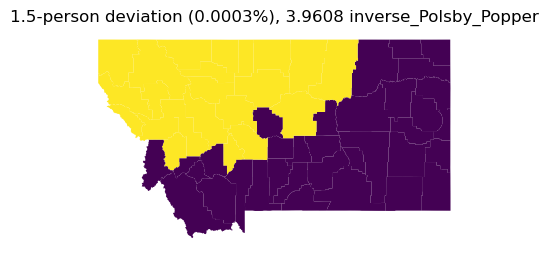

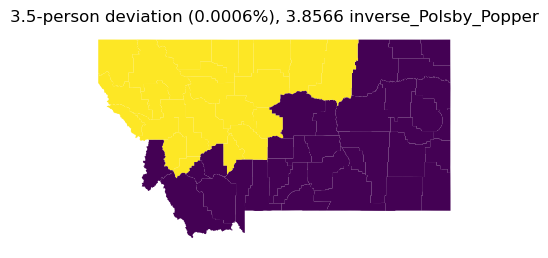

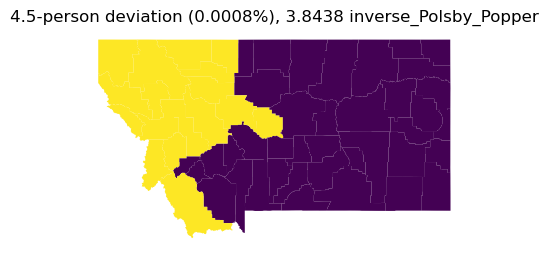

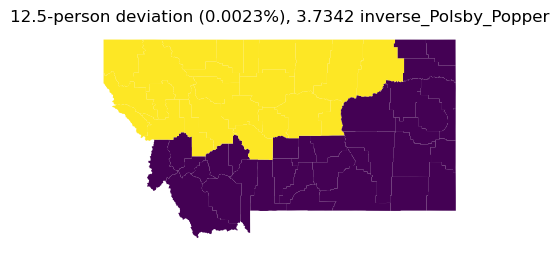

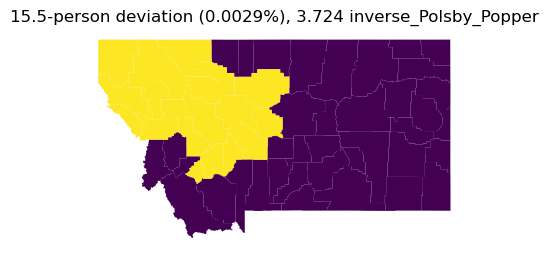

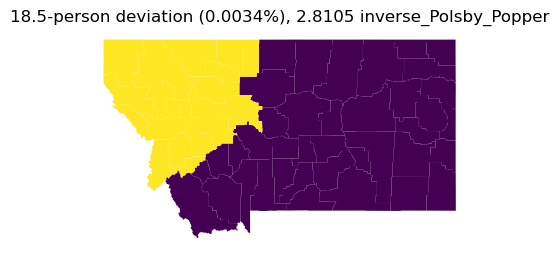

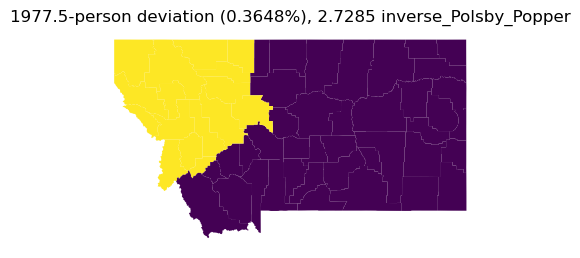

No feasible solution was found within the region: [0, 0.5]

####################################################################################################
Pareto Frontier for state MT,  objective average_Polsby_Popper
####################################################################################################

Pareto front plans: [[[0, 1, 5, 6, 7, 8, 9, 11, 12, 15, 16, 17, 20, 21, 24, 25, 27, 28, 29, 30, 32, 33, 34, 36, 37, 38, 41, 42, 43, 44, 46, 48, 49, 51, 52, 53, 55], [2, 3, 4, 10, 13, 14, 18, 19, 22, 23, 26, 31, 35, 39, 40, 45, 47, 50, 54]], [[1, 5, 6, 7, 8, 9, 12, 14, 15, 16, 17, 18, 20, 21, 25, 27, 28, 29, 30, 31, 32, 33, 36, 37, 38, 39, 40, 41, 44, 45, 48, 49, 50, 52], [0, 2, 3, 4, 10, 11, 13, 19, 22, 23, 24, 26, 34, 35, 42, 43, 46, 47, 51, 53, 54, 55]], [[1, 5, 6, 7, 8, 9, 14, 15, 16, 17, 18, 20, 21, 25, 27, 28, 30, 31, 32, 33, 36, 37, 38, 39, 40, 41, 44, 45, 48, 49, 50, 52, 55], [0, 2, 3, 4, 10, 11, 12, 13, 19, 22, 23, 24, 26, 29, 34, 35, 42, 43, 46, 47, 51, 53,

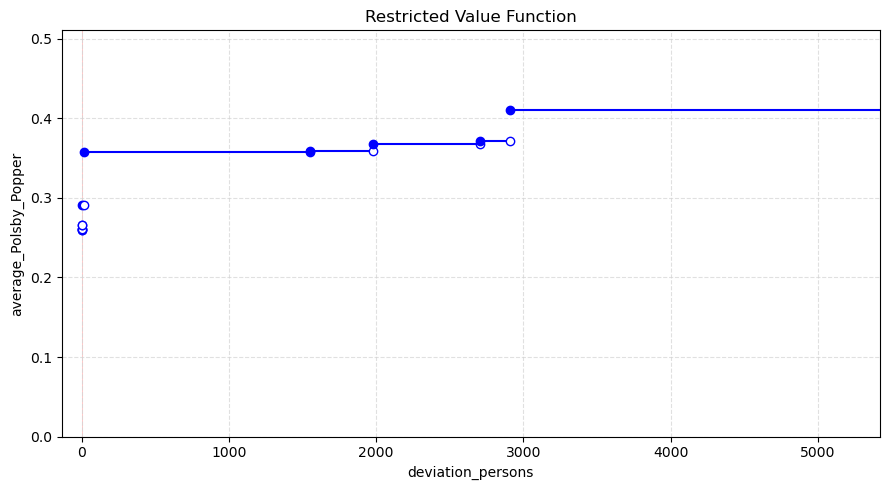

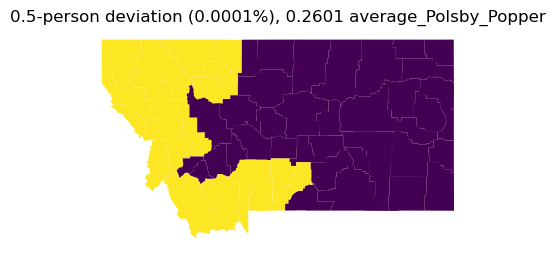

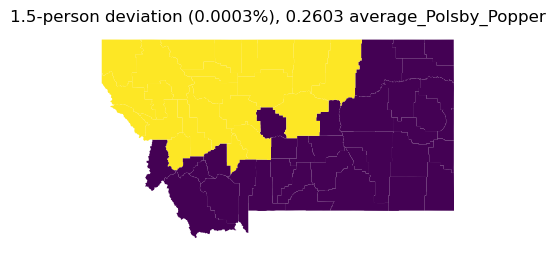

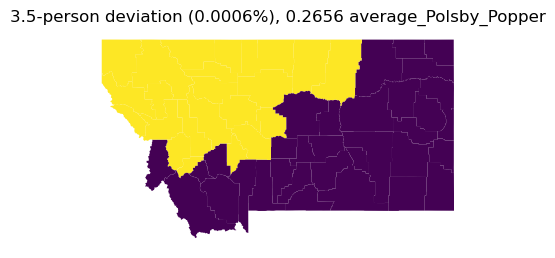

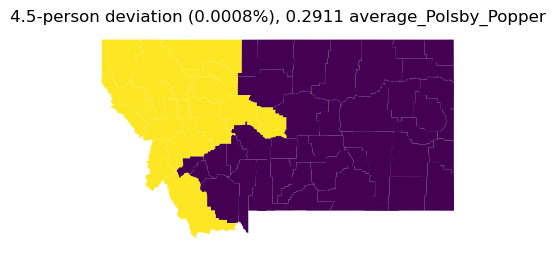

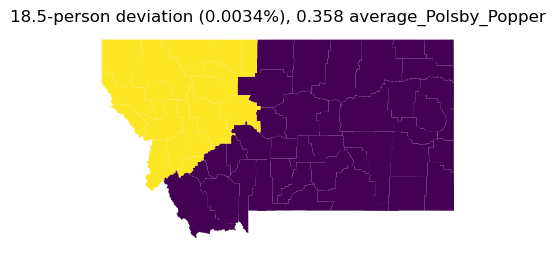

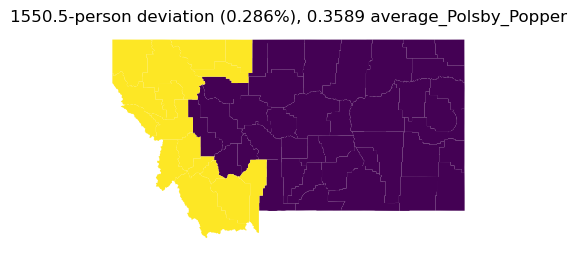

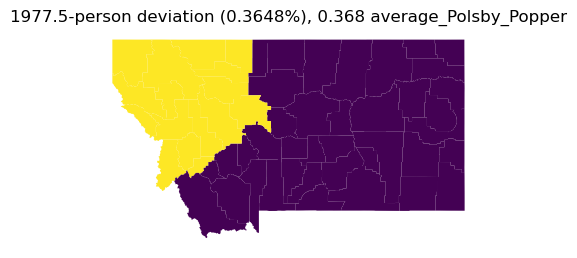

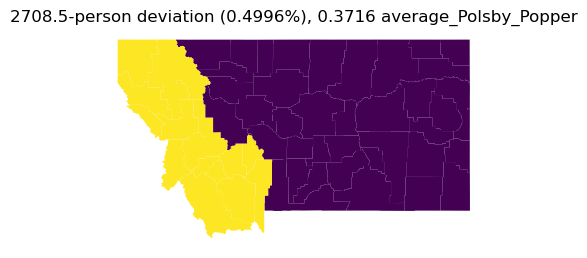

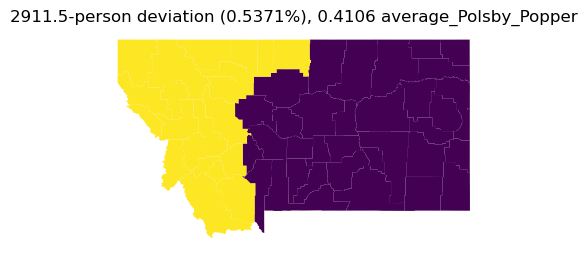

No feasible solution was found within the region: [0, 0.5]

####################################################################################################
Pareto Frontier for state MT,  objective bottleneck_Polsby_Popper
####################################################################################################

Pareto front plans: [[[0, 1, 5, 8, 9, 12, 13, 14, 18, 20, 21, 25, 27, 28, 29, 30, 38, 39, 40, 41, 43, 44, 45, 46, 49, 50, 52], [2, 3, 4, 6, 7, 10, 11, 15, 16, 17, 19, 22, 23, 24, 26, 31, 32, 33, 34, 35, 36, 37, 42, 47, 48, 51, 53, 54, 55]], [[1, 5, 6, 7, 8, 9, 12, 14, 15, 16, 17, 18, 20, 21, 25, 27, 28, 29, 30, 31, 32, 33, 36, 37, 38, 39, 40, 41, 44, 45, 48, 49, 50, 52], [0, 2, 3, 4, 10, 11, 13, 19, 22, 23, 24, 26, 34, 35, 42, 43, 46, 47, 51, 53, 54, 55]], [[1, 5, 6, 7, 8, 9, 14, 15, 16, 17, 18, 20, 21, 25, 27, 28, 30, 31, 32, 33, 36, 37, 38, 39, 40, 41, 44, 45, 48, 49, 50, 52, 55], [0, 2, 3, 4, 10, 11, 12, 13, 19, 22, 23, 24, 26, 29, 34, 35, 42, 43, 46, 47, 51, 

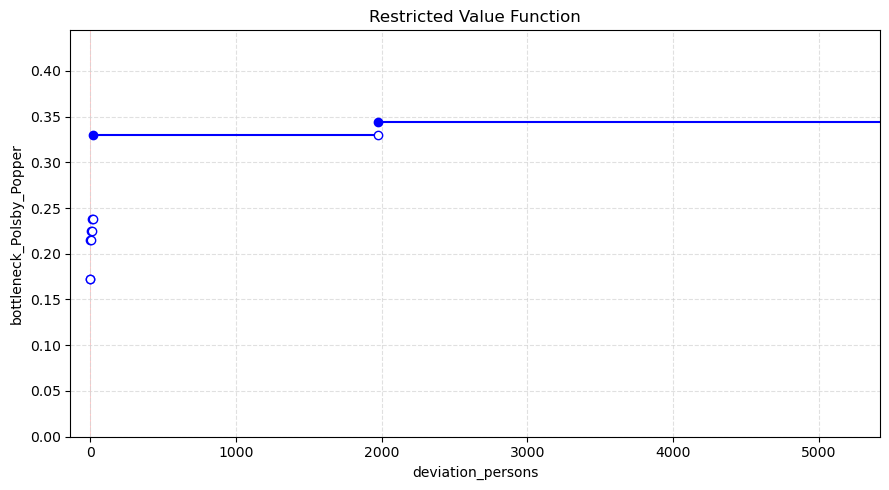

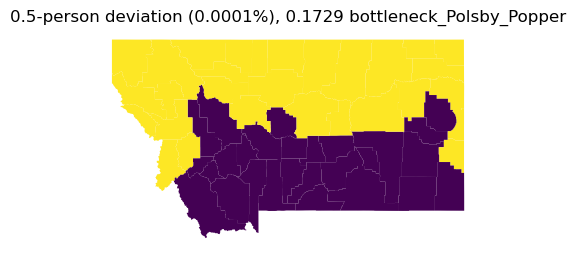

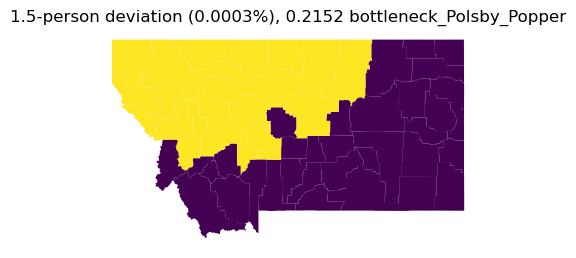

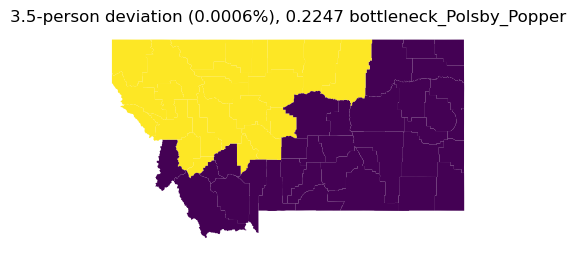

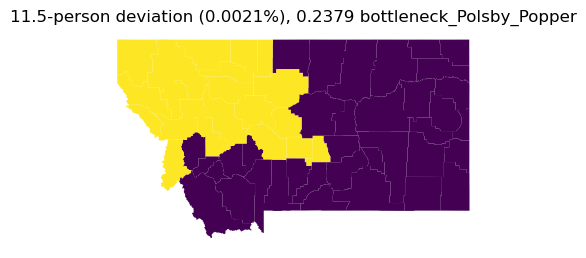

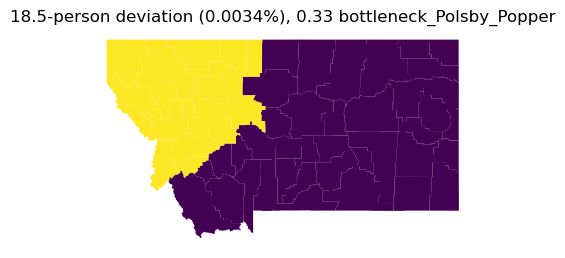

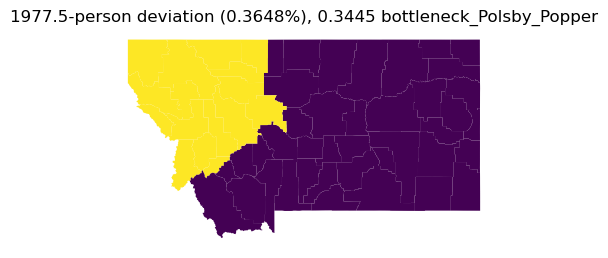

In [7]:
from pareto import plot_pareto_frontiers

epsilon = 1 / (2 * G._k)
for (state, obj_type), result in plans_dict.items():
    
    min_deviation = min(round(r[2], 1) for r in result)
    if min_deviation < epsilon:
        no_solution_region = None
    else:
        no_solution_region = [0, min_deviation]
        print(f"No feasible solution was found within the region: {no_solution_region}")
        
    plot_pareto_frontiers(
                    G,
                    method='epsilon_constraint_method',
                    plans=None,                                   #if method ='epsilon_constraint_method' is None 
                    obj_types=obj_type,                               
                    ideal_population=G._ideal_population,
                    state=state,
                    filepath=filepath,
                    filename2=filename2,
                    no_solution_region=no_solution_region,
                    year=year,
                    result=result                               #if method ='heuristic' is None 
                 )